In [1]:
import pandas as pd 
import numpy as np

## Data cleaning

In [161]:
ena = pd.read_csv('data.csv')
ena.head()


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [4]:
len(ena)

4009

In [6]:
ena

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


### Data with the same headlines

In [13]:
ena['Headline'].value_counts()

2017 Fantasy Football IDP Rankings - Week 5                                                       6
2017 Fantasy Football Team Defense Rankings - Week 4                                              6
10/2 Games: Bucs Clinch In '74, Boston Evens WS, Goose & Teke at 72, Triple-Bill, Game Stories    6
9/29 Through the 40s: HBD Cannonball & Paul, Camnitz Clan, Game Stories                           6
2017 Fantasy Football Kicker Rankings - Week 5                                                    6
                                                                                                 ..
Vice President Pence, Second Lady Hold Tax Reform Event Monday [Live Stream]                      1
VW to develop electric trucks in $1.7 billion technology drive                                    1
Germany may not agree new coalition until next year: Merkel ally                                  1
Amazon must pay $295 million in back taxes, EU says                                               1


In [20]:
ena = ena[ena.groupby("Headline")["Headline"].transform('size') > 5]

### Dropping Null values

In [48]:
 ena.dropna()


,URLs,Headline,Body,Label
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0
21,http://beforeitsnews.com/sports/2017/09/928-th...,"9/28 Through the 40s: The Gloaming; HBD Bill, ...","Vietnam Is in Great Danger, You Must Publish a...",0
24,http://beforeitsnews.com/sports/2017/09/929-th...,"9/29 Through the 40s: HBD Cannonball & Paul, C...",Red Flag Warning: These California Wildfires A...,0
38,http://beforeitsnews.com/sports/2017/10/101-ex...,10/1 Expo Park-Forbes Field Era: Deacon Whips ...,A Potato Battery Can Light up a Room for Over ...,0
45,http://beforeitsnews.com/sports/2017/09/ravens...,Ravens vs. Steelers - Friday/Game Status,Warning Something Big Is About to Happen in Am...,0
...,...,...,...,...
3916,http://beforeitsnews.com/sports/2017/10/102-ha...,"10/2 Happenings: HBD Ernie,Honest Eddie, Rex, ...","Vietnam Is in Great Danger, You Must Publish a...",0
3934,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,"Vietnam Is in Great Danger, You Must Publish a...",0
3950,http://beforeitsnews.com/sports/2017/09/ravens...,Ravens vs. Steelers - Wednesday,A Potato Battery Can Light up a Room for Over ...,0
3993,http://beforeitsnews.com/sports/2017/10/102-ha...,"10/2 Happenings: HBD Ernie,Honest Eddie, Rex, ...",An Embattled Pharmaceutical Company That Sells...,0


In [23]:
ena.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

## Data splitting

In [25]:
from sklearn.model_selection import train_test_split

In [152]:
ena['Label']

11      0
21      0
24      0
38      0
45      0
       ..
3916    0
3934    0
3950    0
3993    0
3998    0
Name: Label, Length: 132, dtype: int64

In [153]:
ena['Body']

11      2017 Fantasy Football Team Defense Rankings – ...
21      Vietnam Is in Great Danger, You Must Publish a...
24      Red Flag Warning: These California Wildfires A...
38      A Potato Battery Can Light up a Room for Over ...
45      Warning Something Big Is About to Happen in Am...
                              ...                        
3916    Vietnam Is in Great Danger, You Must Publish a...
3934    Vietnam Is in Great Danger, You Must Publish a...
3950    A Potato Battery Can Light up a Room for Over ...
3993    An Embattled Pharmaceutical Company That Sells...
3998    No Getting Around it, The War Is Coming! Trump...
Name: Body, Length: 132, dtype: object

In [149]:
Xtrain,Xtest,ytrain,ytest = train_test_split(ena['Body'], ena['Label'])

In [120]:
Xtrain.shape

(50,)

In [49]:
Xtest.shape

(33,)

### Validation

In [143]:
Xtrain,Xval,ytrain,yval = train_test_split(Xtrain, ytrain ,test_size = 0.2, random_state= 0 )         

In [62]:
Xtrain.size

63

In [133]:
yval.size

10

## Converting text data into numerical data

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
ena = ena.dropna()

In [166]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(ena["Body"])

In [167]:
#spltting the dataset

from sklearn.model_selection import train_test_split

In [168]:
Xtrain, Xtest, ytrain, ytest = train_test_split(tfid_x_train, ena["Label"])

### Heatmap

<AxesSubplot:>

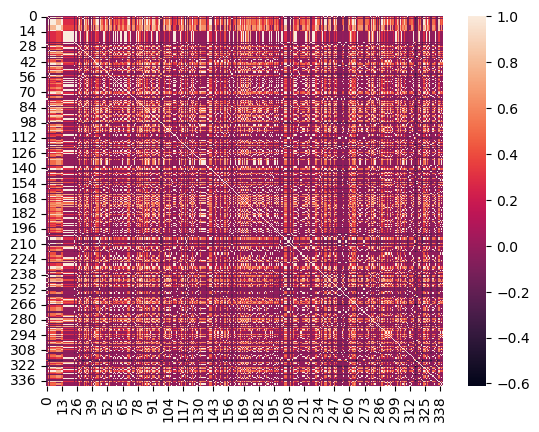

In [39]:
sns.heatmap(Xtrain_df.corr())

### Correlation Matrices

In [43]:
x= Xtrain_df.corr()

In [44]:
x

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,1.000000,-0.133288,-0.213970,-0.133288,-0.133288,-0.133288,-0.133288,-0.133288,-0.111907,-0.111907,...,-0.069978,-0.069978,-0.069978,-0.049229,-0.172301,-0.213970,-0.122627,-0.049229,-0.069978,-0.049229
1,-0.133288,1.000000,-0.120082,1.000000,1.000000,1.000000,1.000000,1.000000,0.778310,0.778310,...,0.514606,0.514606,0.497060,0.273248,-0.096697,-0.120082,0.908458,0.394751,0.497060,0.394751
2,-0.213970,-0.120082,1.000000,-0.120082,-0.120082,-0.120082,-0.120082,-0.120082,-0.100820,-0.100820,...,-0.063045,-0.063045,-0.063045,-0.044351,-0.155230,-0.192771,-0.110478,-0.044351,-0.063045,-0.044351
3,-0.133288,1.000000,-0.120082,1.000000,1.000000,1.000000,1.000000,1.000000,0.778310,0.778310,...,0.514606,0.514606,0.497060,0.273248,-0.096697,-0.120082,0.908458,0.394751,0.497060,0.394751
4,-0.133288,1.000000,-0.120082,1.000000,1.000000,1.000000,1.000000,1.000000,0.778310,0.778310,...,0.514606,0.514606,0.497060,0.273248,-0.096697,-0.120082,0.908458,0.394751,0.497060,0.394751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-0.213970,-0.120082,-0.192771,-0.120082,-0.120082,-0.120082,-0.120082,-0.120082,-0.100820,-0.100820,...,-0.063045,-0.063045,-0.063045,-0.044351,-0.155230,1.000000,-0.110478,-0.044351,-0.063045,-0.044351
337,-0.122627,0.908458,-0.110478,0.908458,0.908458,0.908458,0.908458,0.908458,0.857384,0.857384,...,0.566509,0.566509,0.547419,0.301946,-0.088963,-0.110478,1.000000,-0.025418,0.547419,-0.025418
338,-0.049229,0.394751,-0.044351,0.394751,0.394751,0.394751,0.394751,0.394751,-0.023196,-0.023196,...,-0.014505,-0.014505,-0.014505,-0.010204,-0.035714,-0.044351,-0.025418,1.000000,-0.014505,1.000000
339,-0.069978,0.497060,-0.063045,0.497060,0.497060,0.497060,0.497060,0.497060,0.638296,0.638296,...,-0.020619,-0.020619,1.000000,-0.014505,-0.050767,-0.063045,0.547419,-0.014505,1.000000,-0.014505


### Box blot

In [71]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1acb641df40>,
 'caps': [<matplotlib.lines.Line2D at 0x1acb61f3520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1acb641dc70>,
 'medians': [<matplotlib.lines.Line2D at 0x1acb61f3ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1acb61f3d90>,
 'means': []}

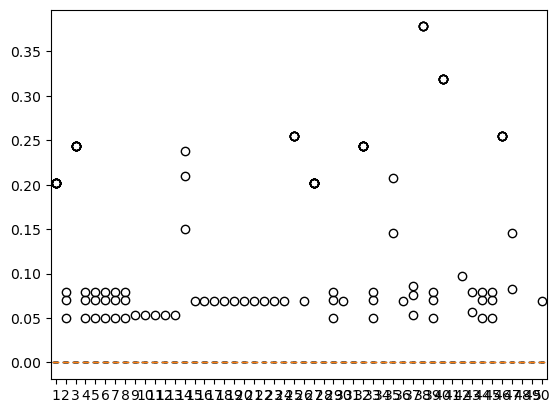

In [77]:
plt.boxplot(Xtrain_df.iloc[:50, :50])

In [75]:
Xtrain_df.iloc[:50].shape

(50, 341)

###  Feature Independence Plots

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>]], dtype=object)

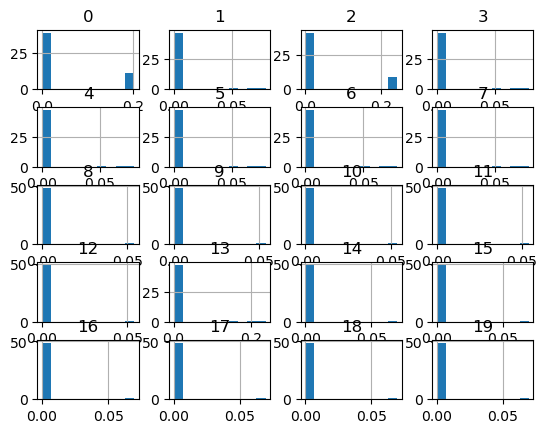

In [82]:
 Xtrain_df.iloc[:50, : 20] .hist()


### Outliers

In [83]:
print(np.where(ena['Body']))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131], dtype=int64),)


### Trend of space and time 

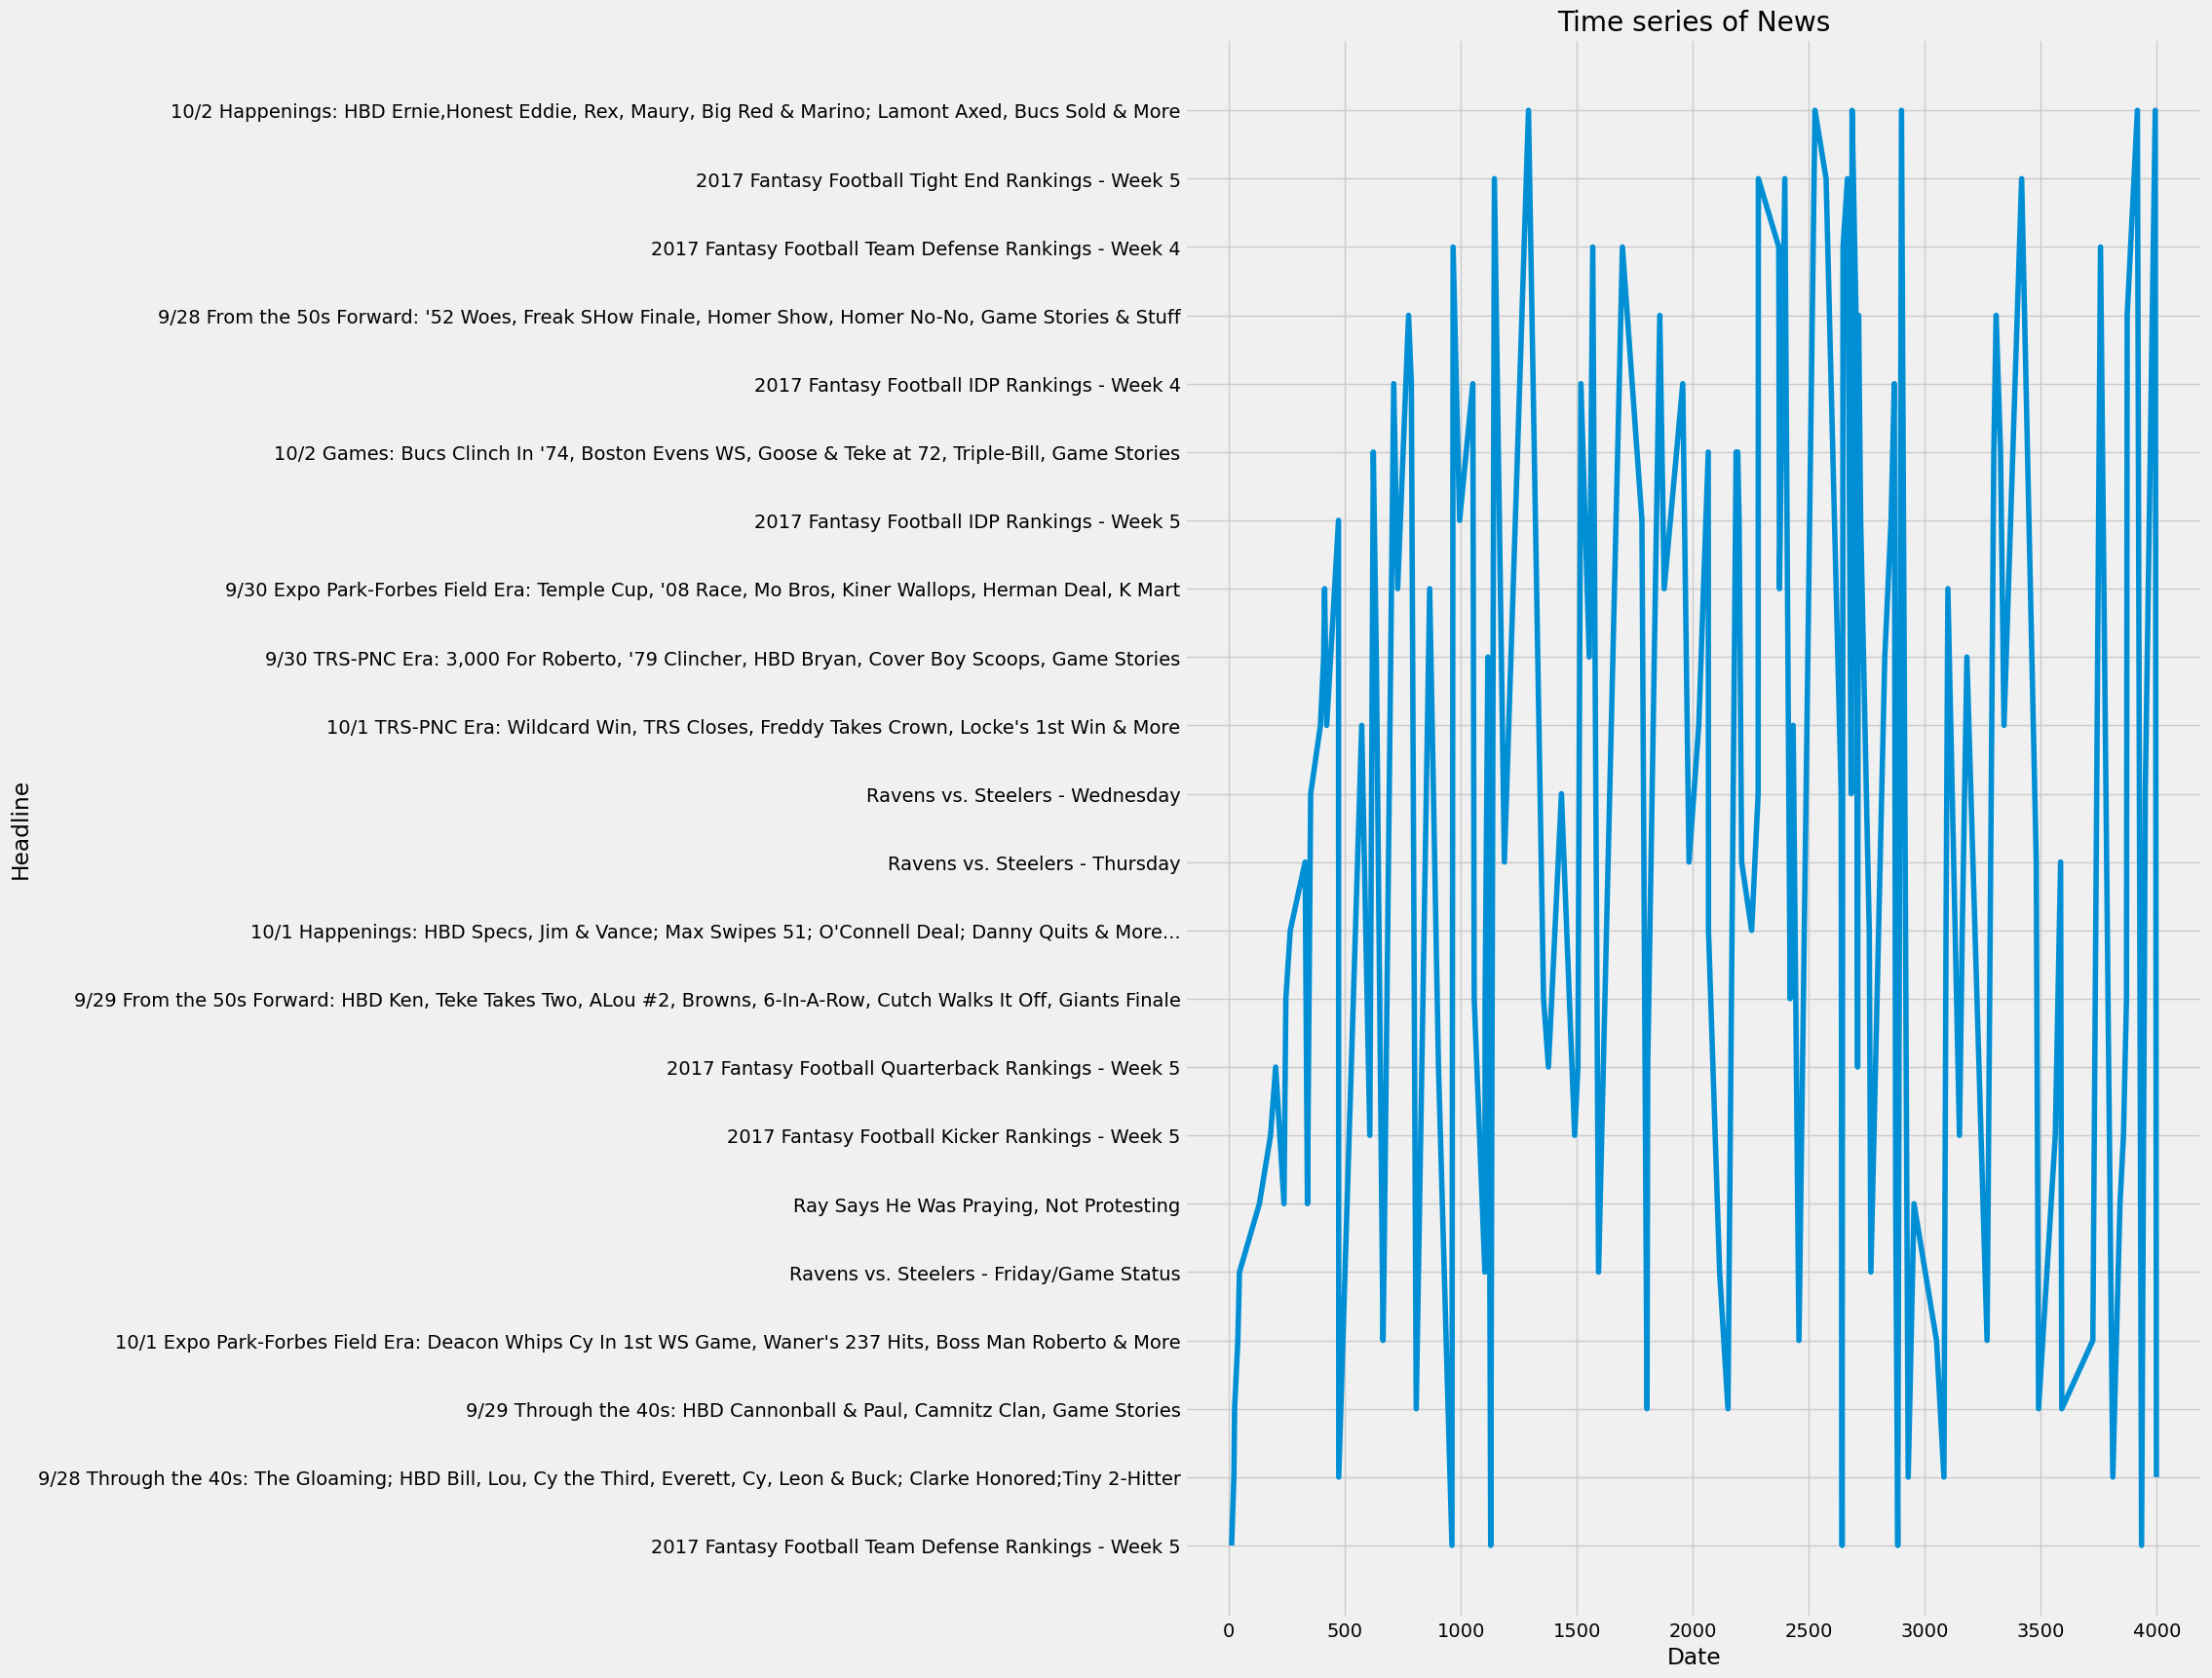

In [85]:
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
plt.figure(figsize= (12, 20))
plt.xlabel("Date")
plt.ylabel("Headline")
plt.title("Time series of News")
plt.plot(ena["Headline"])

### Patterns of Interest

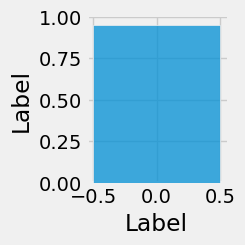

In [121]:
#pairplots
sns.pairplot(ena)

### Model fitting 

In [160]:
ytrain.head()

3268    0
2714    0
2281    0
3490    0
2854    0
Name: Label, dtype: int64

In [170]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter = 50)
model.fit(Xtrain, ytrain)


PassiveAggressiveClassifier(max_iter=50)

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [174]:
pred = model.predict(Xtest)
accuracy = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest,pred)
print("Accuracy_score : {} ".format(accuracy))
print("Confusion matrix : {}". format(cm))

Accuracy_score : 0.9779338014042126 
Confusion matrix : [[520  12]
 [ 10 455]]


In [156]:
Xtrain,Xtest,ytrain,ytest = train_test_split(tfid_x_train, yutr)

ValueError: Found input variables with inconsistent numbers of samples: [25, 132]

### Word cloud

In [113]:
!pip.install wordcloud

'pip.install' is not recognized as an internal or external command,
operable program or batch file.


In [112]:
from wordcloud import WorldCloud 
text1= " ".join(title for title in ena.Headline)
word_cloud = WordCloud(collations = False, background_color = 'white', idth = 2048, height = 1080)
word_cloud.to_file('got.png')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'